In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, RidgeClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, precision_score, recall_score, auc, confusion_matrix, roc_curve, RocCurveDisplay

# **Data exploration and visualization**

In [3]:
train_data = pd.read_csv("train.csv")

In [4]:
train_data.head()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp,label
0,0.041268,15499.00,64.00,7805.845961,7805.845961,0.0,0.0,0.00,0.00,50.00,...,0,0,0,0,0,0,0,1,0,DDoS
1,0.018393,3702.54,64.00,6728.994198,6728.994198,0.0,0.0,0.00,0.01,54.28,...,0,0,0,0,0,0,0,1,0,DDoS
2,0.000000,182.00,64.00,38.559448,38.559448,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,1,0,DoS
3,0.109292,35027.55,62.72,6783.234241,6783.234241,0.0,0.0,0.03,0.11,65.11,...,0,0,0,0,0,0,0,1,0,DoS
4,0.000000,162.00,64.00,2.305494,2.305494,0.0,0.0,0.00,0.00,162.00,...,0,0,0,0,0,0,0,1,0,DoS


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938583 entries, 0 to 938582
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flow_time         938583 non-null  float64
 1   header_size       938583 non-null  float64
 2   packet_duration   938583 non-null  float64
 3   overall_rate      938583 non-null  float64
 4   src_rate          938583 non-null  float64
 5   dst_rate          938583 non-null  float64
 6   fin_packets       938583 non-null  float64
 7   urg_packets       938583 non-null  float64
 8   rst_packets       938583 non-null  float64
 9   max_value         938583 non-null  float64
 10  value_covariance  938583 non-null  float64
 11  fin_flags         938583 non-null  int64  
 12  syn_flags         938583 non-null  int64  
 13  rst_flags         938583 non-null  int64  
 14  psh_flags         938583 non-null  int64  
 15  ack_flags         938583 non-null  int64  
 16  protocol_http     93

In [5]:
train_data.describe()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp
count,9.385830e+05,9.385830e+05,938583.000000,9.385830e+05,9.385830e+05,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,...,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000
mean,1.342515e+01,1.018134e+05,82.664589,9.163496e+03,9.163496e+03,0.000002,0.099474,5.850813,37.137514,177.161360,...,0.087102,0.208346,0.091149,0.088415,0.121502,0.048001,0.054196,0.574175,0.211410,0.164314
std,5.898099e+03,1.801377e+06,166.986325,1.001806e+05,1.001806e+05,0.000898,0.299712,70.715367,324.613580,515.425327,...,0.281984,0.406126,0.287821,0.283898,0.326710,0.213769,0.226403,0.494468,0.408309,0.370560
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,5.400000e+01,64.000000,2.077046e+00,2.077046e+00,0.000000,0.000000,0.000000,0.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,5.400000e+01,64.000000,1.570377e+01,1.570377e+01,0.000000,0.000000,0.000000,0.000000,54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.017542e-01,3.640000e+02,64.000000,1.177706e+02,1.177706e+02,0.000000,0.000000,0.000000,0.010000,55.140000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.930147e+06,3.311174e+08,6525.740000,7.340032e+06,7.340032e+06,0.848465,19.500000,4136.700000,9331.500000,30329.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train_data.duplicated().sum()

np.int64(96187)

In [7]:
train_data.drop_duplicates(inplace=True)

In [8]:
train_data.isna().sum()

flow_time           0
header_size         0
packet_duration     0
overall_rate        0
src_rate            0
dst_rate            0
fin_packets         0
urg_packets         0
rst_packets         0
max_value           0
value_covariance    0
fin_flags           0
syn_flags           0
rst_flags           0
psh_flags           0
ack_flags           0
protocol_http       0
protocol_https      0
protocol_tcp        0
protocol_udp        0
protocol_icmp       0
label               0
dtype: int64

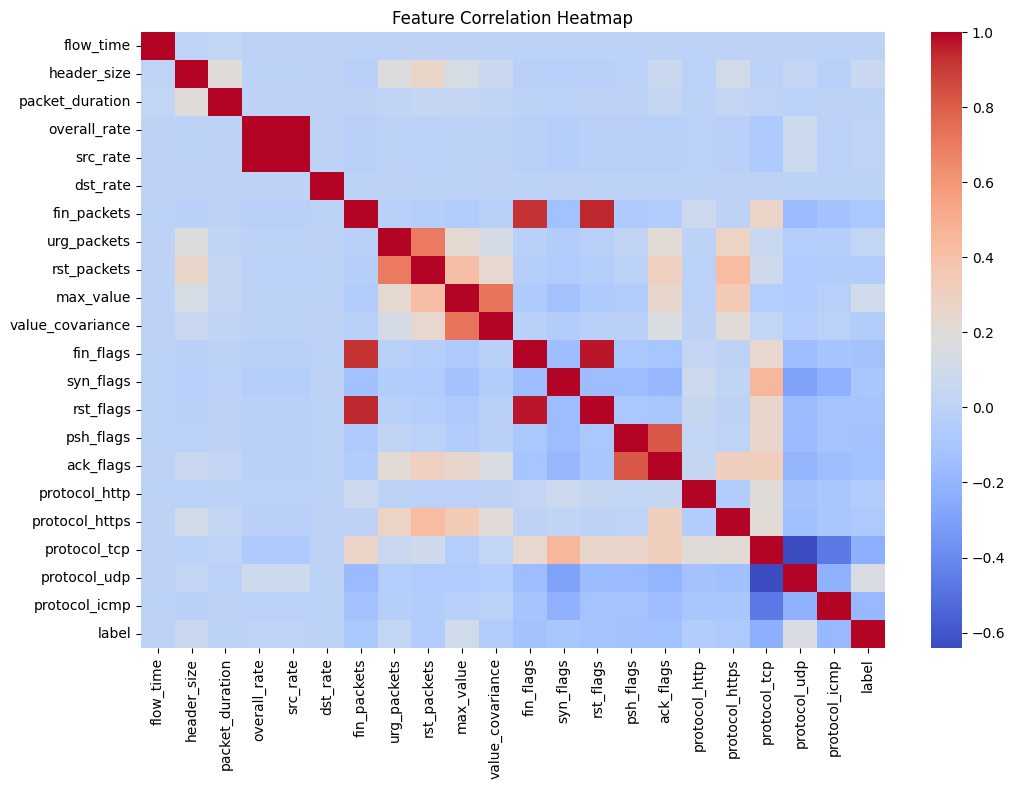

In [9]:
categorical_columns = train_data.select_dtypes(include=["object"]).columns.tolist()

le = LabelEncoder()
train_data["label"] = le.fit_transform(train_data["label"])

correlation_matrix = train_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
abs(correlation_matrix["label"]).sort_values(ascending=False)

label               1.000000
protocol_tcp        0.232204
protocol_icmp       0.178745
protocol_udp        0.150481
ack_flags           0.134799
fin_flags           0.128302
psh_flags           0.128180
rst_flags           0.110701
max_value           0.100210
syn_flags           0.094010
fin_packets         0.086056
protocol_https      0.075995
header_size         0.059832
rst_packets         0.056347
protocol_http       0.054522
value_covariance    0.045374
urg_packets         0.025589
src_rate            0.009002
overall_rate        0.009002
packet_duration     0.005567
flow_time           0.003094
dst_rate            0.001039
Name: label, dtype: float64

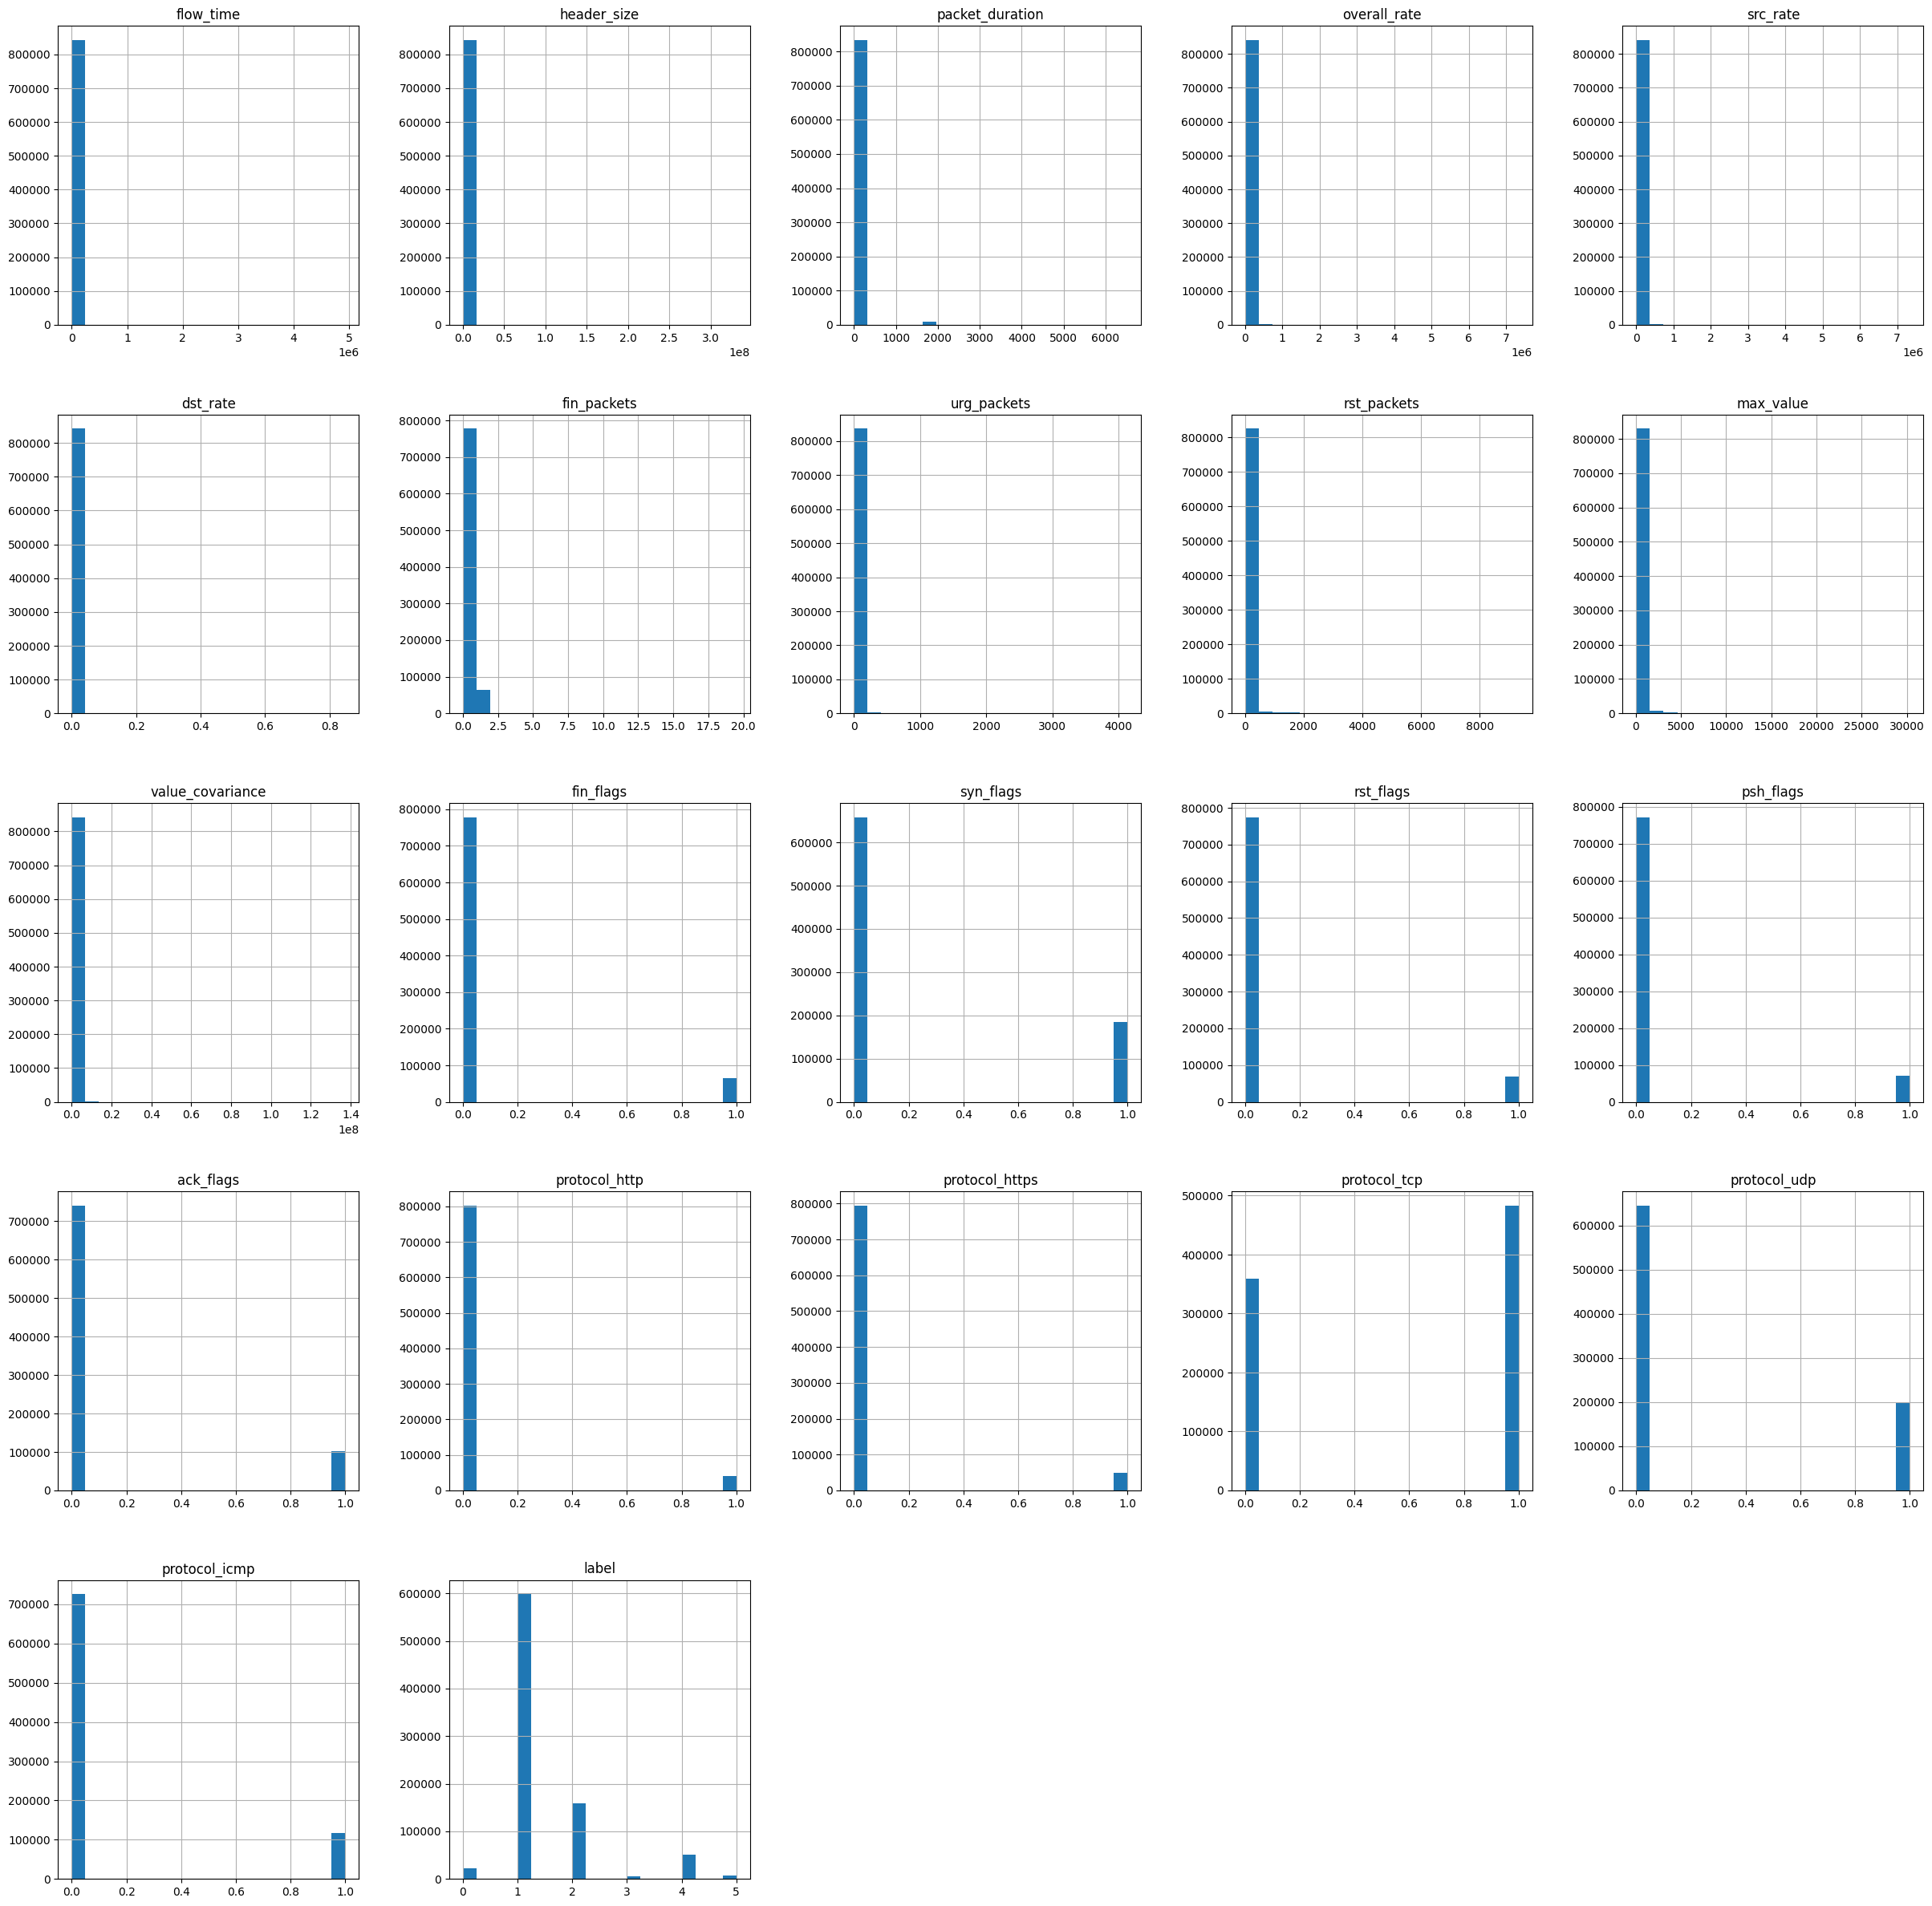

In [10]:
train_data.hist(bins=20, figsize=(30,30))
plt.show()

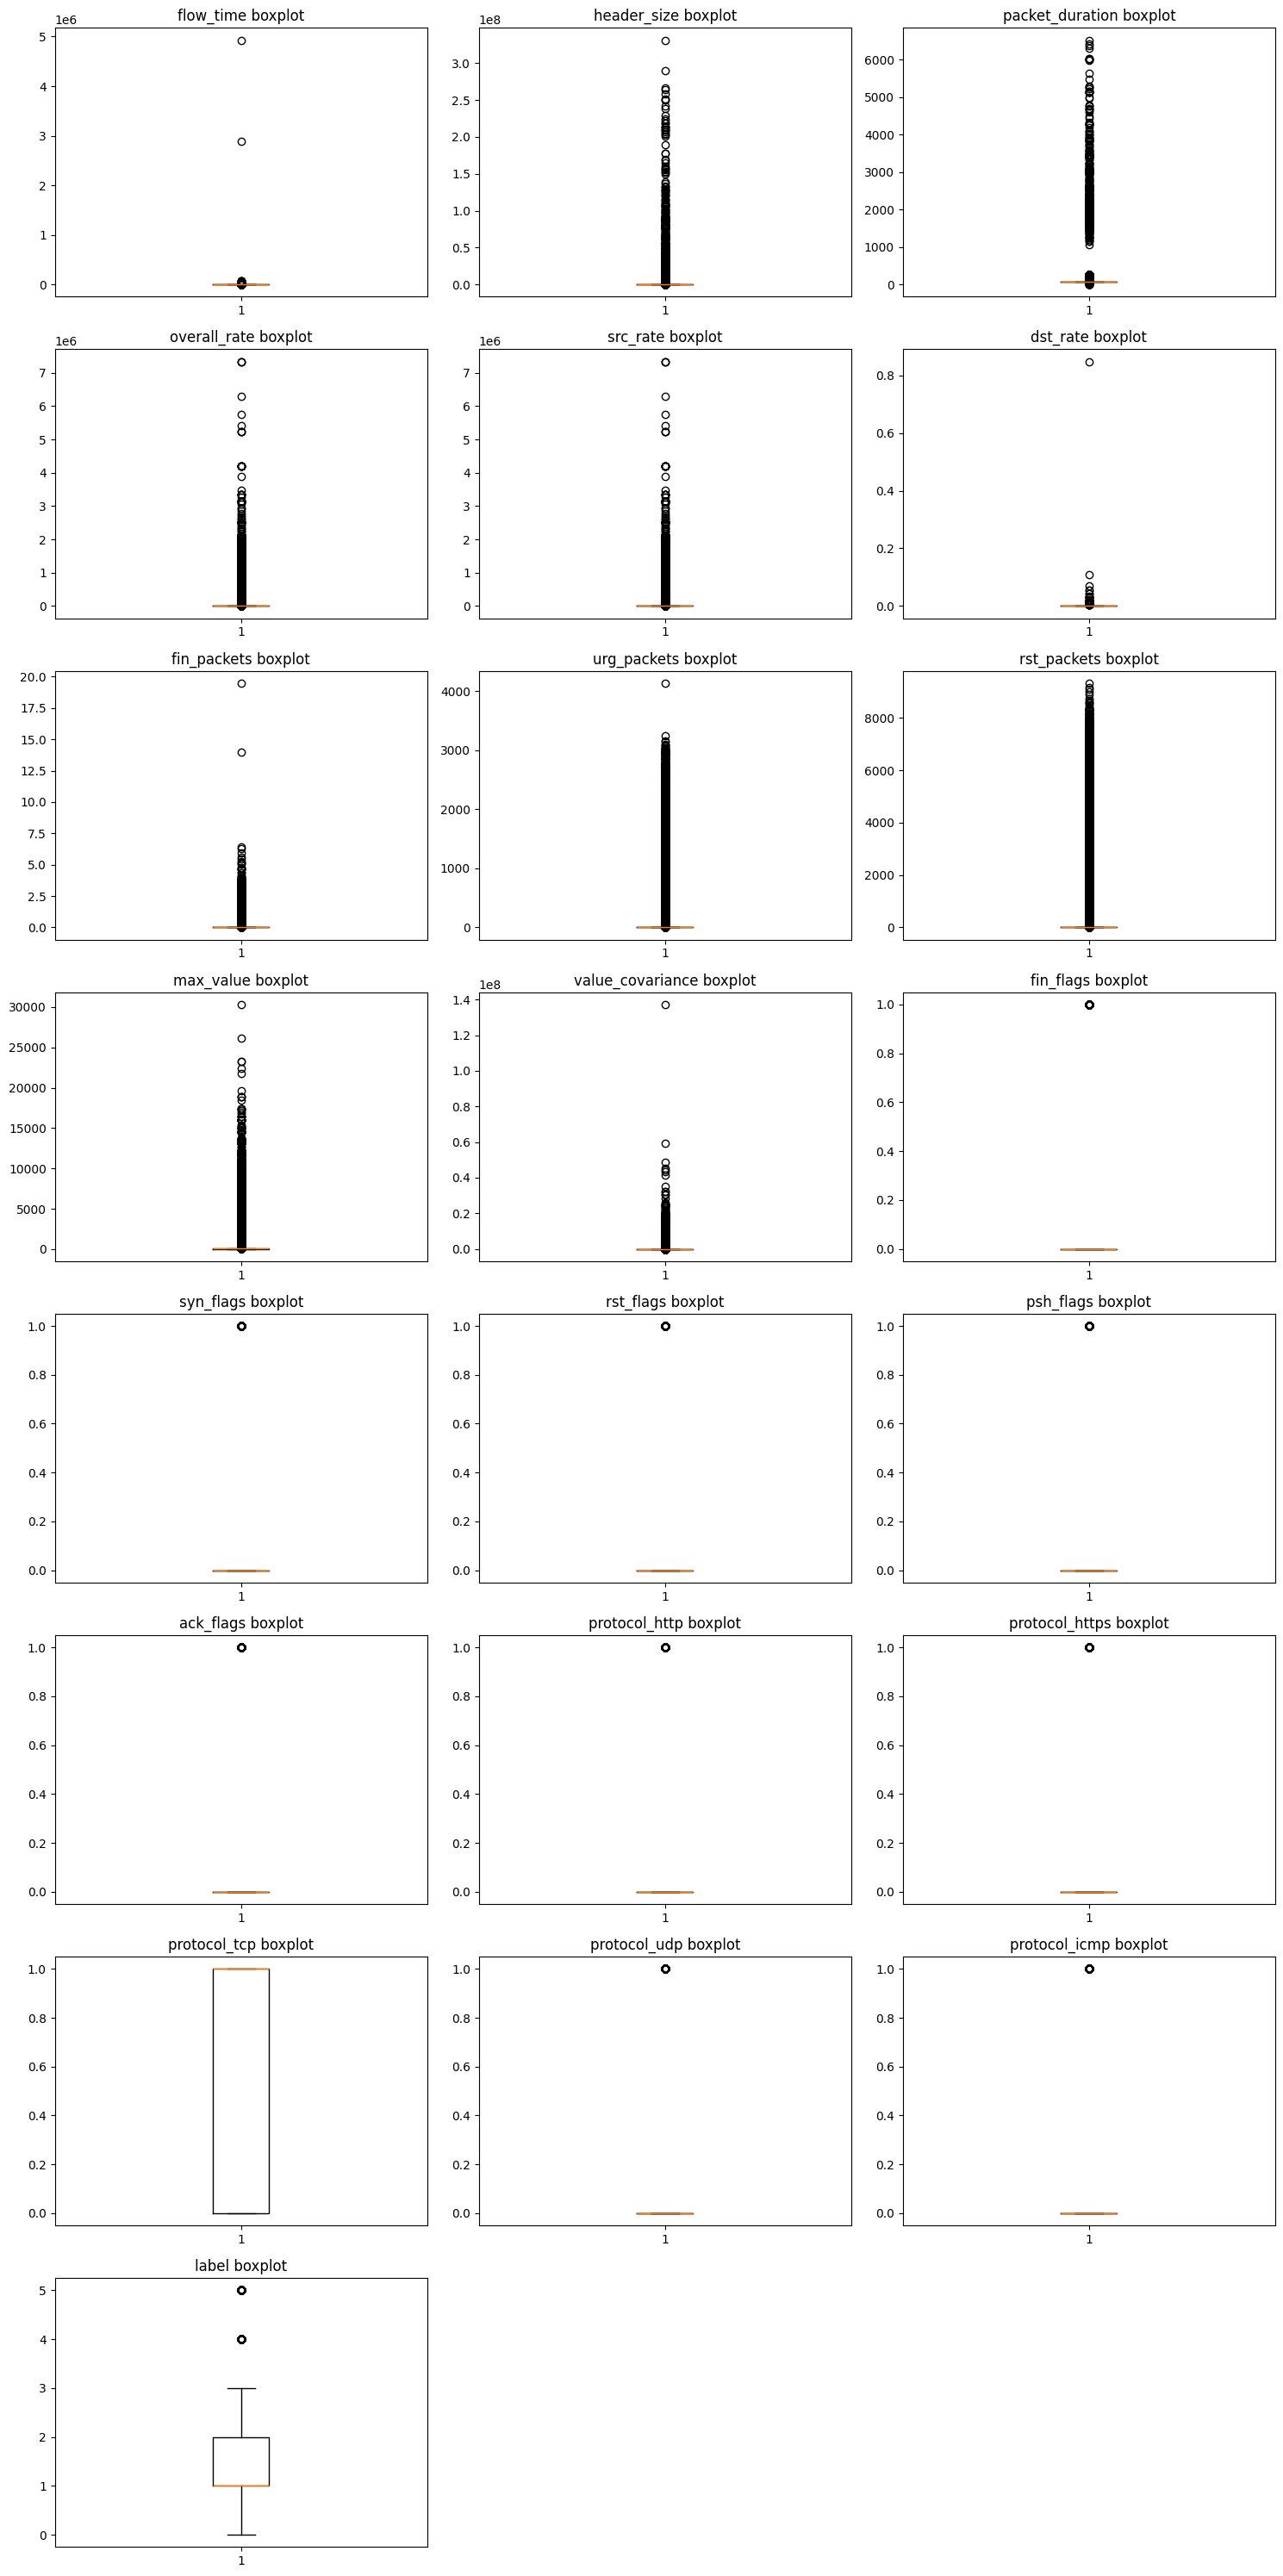

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(8, 3, figsize=(15, 30))
axes = axes.flatten()

for i in range(len(train_data.columns)):
    axes[i].boxplot(train_data[train_data.columns[i]])
    axes[i].set_title(f"{train_data.columns[i]} boxplot")

for j in range(len(train_data.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


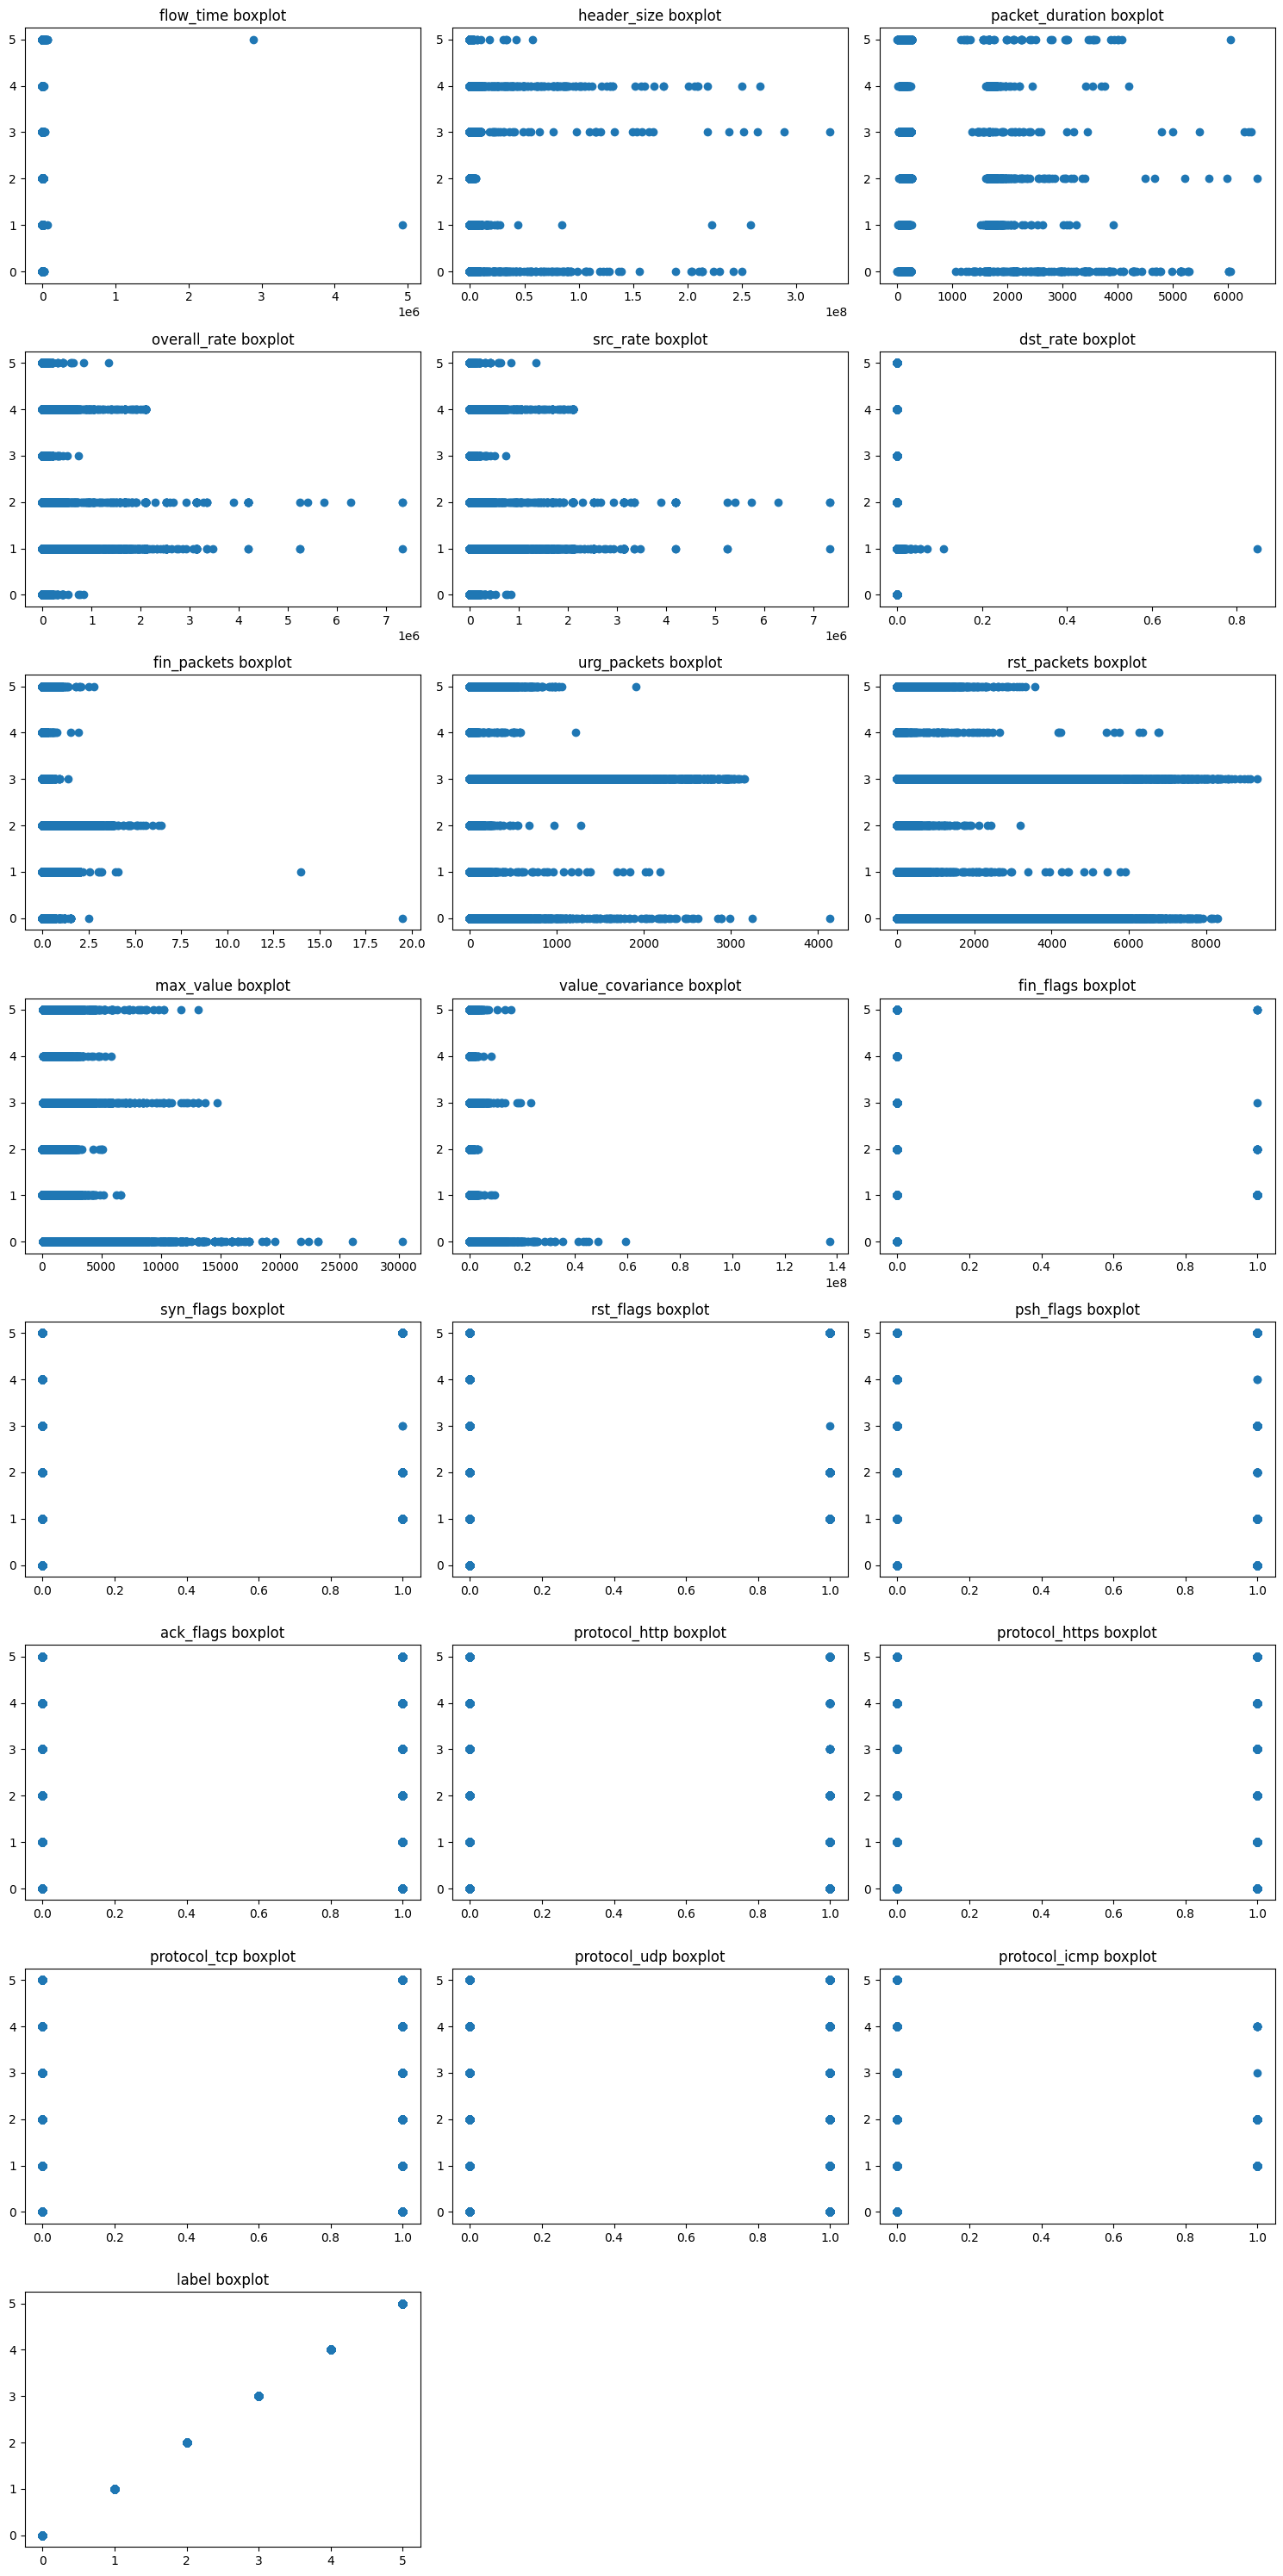

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(8, 3, figsize=(15, 30))
axes = axes.flatten()

for i in range(len(train_data.columns)):
    axes[i].scatter(train_data[train_data.columns[i]], train_data['label'])
    axes[i].set_title(f"{train_data.columns[i]} boxplot")

for j in range(len(train_data.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


**Model Implementation** 

In [12]:
train_data.shape

(842396, 22)

In [13]:
x = train_data.drop(["label"], axis=1)
y = train_data["label"]

In [14]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, random_state=42, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, random_state=42, test_size = 0.2)

In [15]:
x_train.shape

(673916, 21)

In [16]:
x_val.shape

(134784, 21)

In [17]:
x_test.shape

(33696, 21)

In [17]:
# # KNN
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(x_train, y_train)
# knn_pred = knn.predict(x_val)
# accuracy_knn = accuracy_score(y_val, knn_pred)
# print("Accuracy of KNN:", accuracy_knn)
# precision_knn = precision_score(y_val, knn_pred, average="macro")
# print("Precision of KNN:", precision_knn)
# recall_knn = recall_score(y_val, knn_pred, average="macro")
# print("Recall of KNN:", recall_knn)
# f1_score_knn = f1_score(y_val, knn_pred, average="macro")
# print("F1 score of KNN:", f1_score_knn)
# confusion_matrix_knn = confusion_matrix(y_val, knn_pred)
# print("Confusion Matrix of KNN:\n")
# print(confusion_matrix_knn)